# <span style="color:red; font-size: 76px">Titanic Project<span>

# 1. Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Importing required libraries

In [119]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling

pd.pandas.set_option('display.max_columns',None)  # To display, all columns

In [262]:
#model developemnt libraries
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [120]:
df = pd.read_csv('titanic_train.csv')

# <span style="color:red">2. Getting to Know Data<span>

### <span style="color:red">Getting to Know Data<span>

In [121]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [123]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S


In [124]:
df.shape

(891, 12)

## There are 12 columns and total 891 records. Columns describing below information
    1. PassengerId - Describes passanger id
    2. Survived - Output Variable/ Value to predict by model (Survived/ NotSurvived)
    3. Pclass - Passanger Class, i.e. travelling by first class, second class or third class
    4. Name - Name of passanger
    5. Sex - Gender of passanger
    6. Age - Age of passanger
    7. SibSp - Siblings / spouses aboard the Titanic
    8. Parch - parents / children aboard the Titanic
    9. Ticket - Passanger ticked number
    10. Fare - Passanger ticket price
    11. Cabin - Cabin number
    12. Embarked - C: Cherbourg, Q: Queenstown, S: Southampton
Also there are some missing values with NaN in features, we will explore these in Handling missing values

### <span style="color:red">Getting to Overview of Data Types Data<span>

In [125]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [126]:
numerical_data = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Total Numerical Features are = ',len(numerical_data))

Total Numerical Features are =  7


In [127]:
categorical_data = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Total Categorical Features are = ',len(categorical_data))

Total Categorical Features are =  5


### Conclusion - 
    - It is clear that there are 7 Numerical Features
    - There are 5 categorical feature, including Name

## Handling Duplicate Values

In [128]:
df.shape

(891, 12)

In [129]:
df.drop_duplicates(inplace=True)

In [130]:
df.shape

(891, 12)

There are no duplicates in our data set, as there are 891 unique names.

## Exploring five number summery for Numerical Data

In [131]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Conclusion - Based on above data, we can say that
1. For count column - There are some missing values in Age
2. We get first, second and third quartile values
3. We get average of age and fare

## Exploring Categorical Data

In [132]:
df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Conclusion - Based on above data, we can say that
1. For Cabin column - There are only 204 entries, so rest people dident have cabin or values is missing
2. We get unique feature count for each feature
3. Large number of people embarked on RMS at Southampton
4. Total 577 mens were onboard RMS
5. For categoricla feature[Name], all entries are unique
6. There are only three places to embark

## <span style="color:red">Checking missing values<span>

In [133]:
# Checking total number of missing values
df.isnull().sum().sum()

866

Total 866 missing values in all dataset

In [134]:
# Checking feature wise missing values from dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Conclusion: 
    1. There are 177 missing values in Age and 
    2. 687 missing values in Cabin.
    3. For cabin, either cabin is not alloted to passanger or value is missing.

In [135]:
# Features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

# Percentage of missing values
for feature in features_with_na:
    print(feature, (np.round(df[feature].isnull().mean(), 4)) * 100, ' % missing values', 'Total Missing Values = ' ,df[feature].isnull().sum())

Age 19.869999999999997  % missing values Total Missing Values =  177
Cabin 77.10000000000001  % missing values Total Missing Values =  687
Embarked 0.22  % missing values Total Missing Values =  2


## Checking Data Distribuion

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

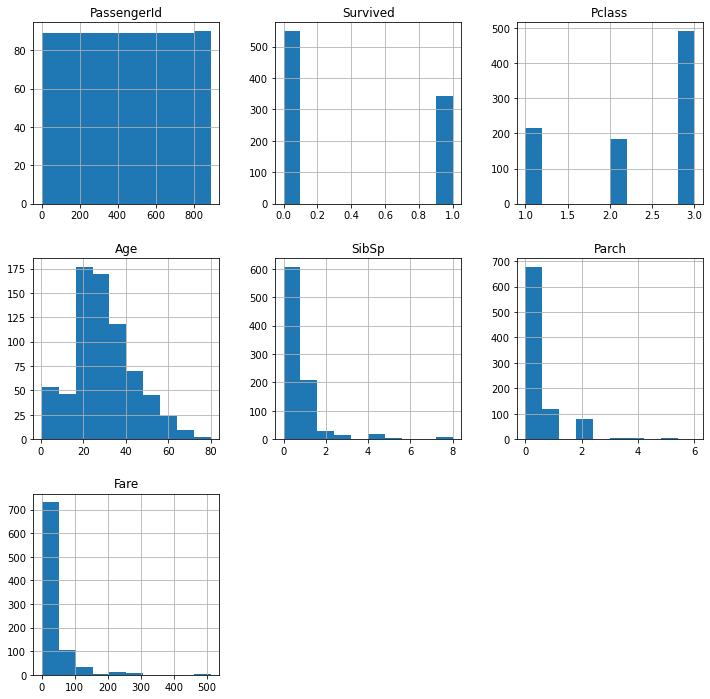

In [136]:
df.hist(figsize=(12,12))

## Conclusion - 
1. From above plots, we can say that there is some skewness in Age.
2. More than 500 people not survived
3. There are less people in first class

In [137]:
df.corr().Survived

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

### Age having very less impact on survival (only 7.7 %). But dropping feature is not option. So handling missing values with imputing.
    - By mean or
    - By Median

# 3. Data Visualization

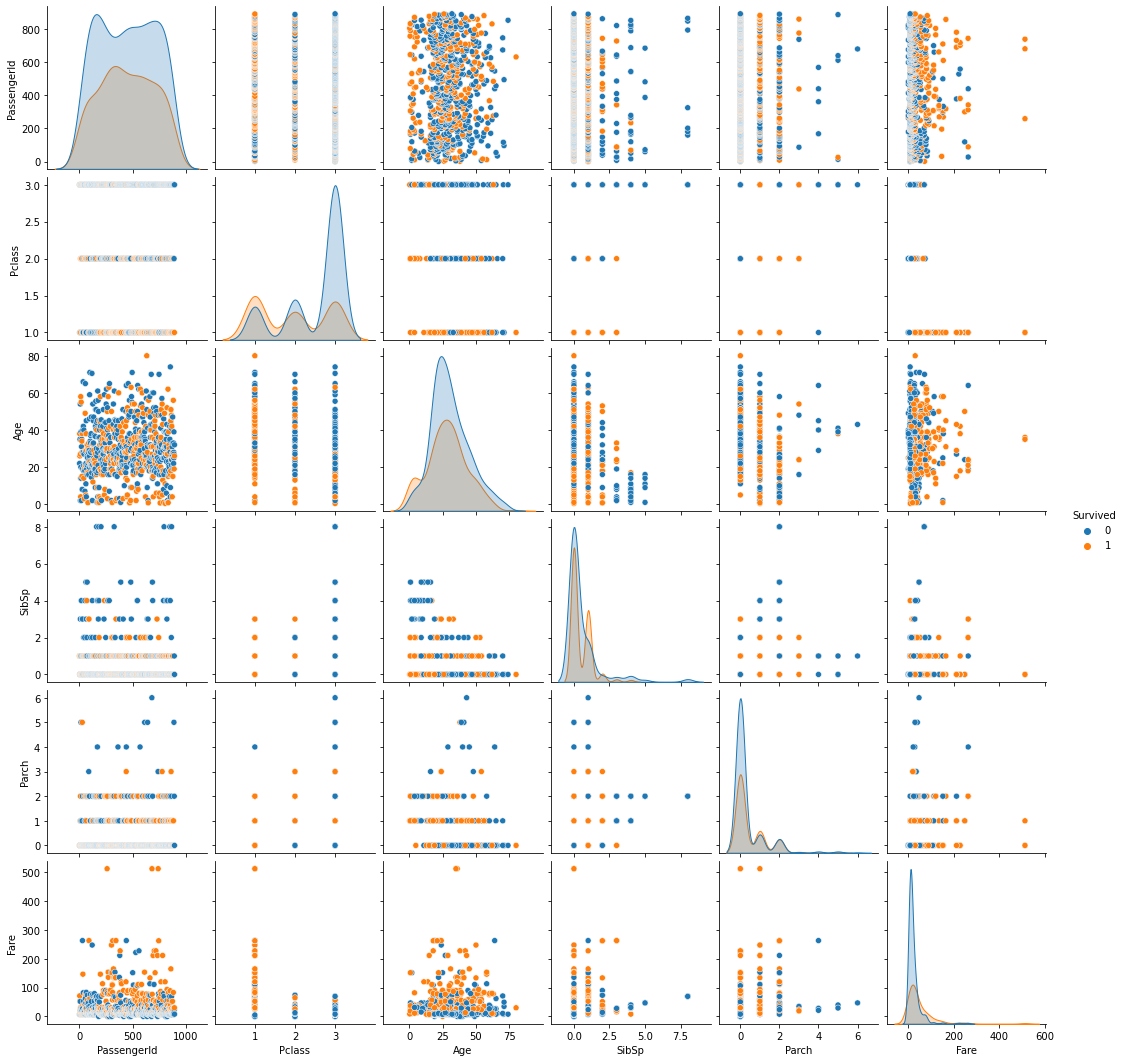

In [138]:
sns.pairplot(df,hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

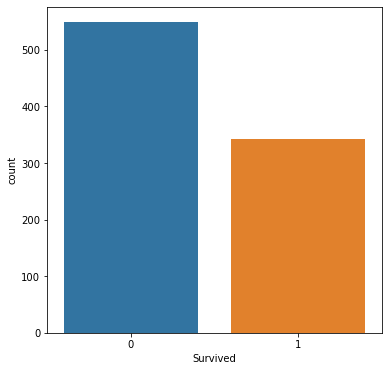

In [141]:
plt.figure(figsize=(6,6))
sns.countplot(x='Survived', data= df)

### Effect of gender on survival

In [142]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [143]:
df2 = df[df.Survived != 0]  # Total Survival
male = df2[df2.Sex == "male"]  # Male Survival
female = df2[df2.Sex == "female"]  # Female Survival
print(f'Out of 577 Males, total {male.shape[0]} males survived, {(round(male.shape[0]/577, 2))*100} %')
print(f'Out of 314 Females, total {female.shape[0]} Females Survived {(round(female.shape[0]/314, 2))*100} %')

Out of 577 Males, total 109 males survived, 19.0 %
Out of 314 Females, total 233 Females Survived 74.0 %


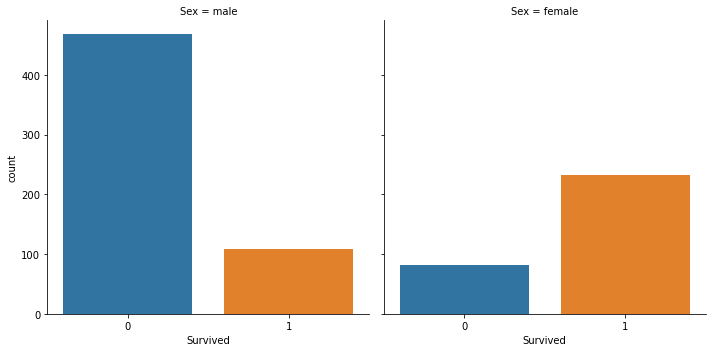

In [144]:
sns.factorplot(x = 'Survived', col = 'Sex', kind = 'count', data = df)
plt.show()

### From above results, females have higher chances of Survival, about 75%. Comparatively mens are more likely to die/sacrifice in Ependamic/critical situation.

### Effect of class on survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

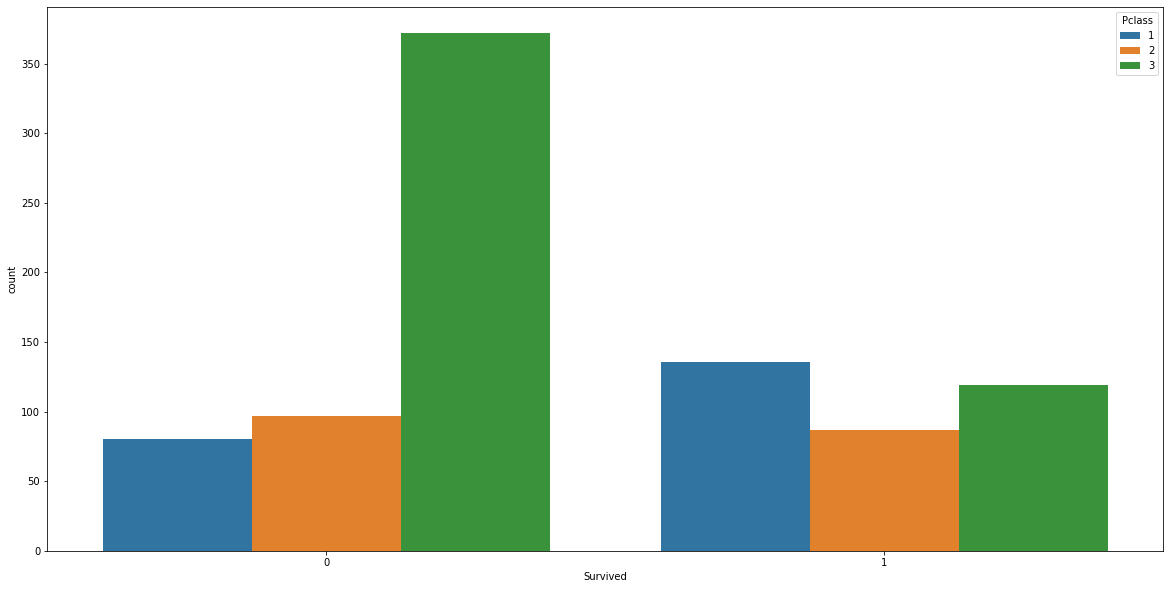

In [145]:
sns.countplot(x='Survived',hue='Pclass', data= df)

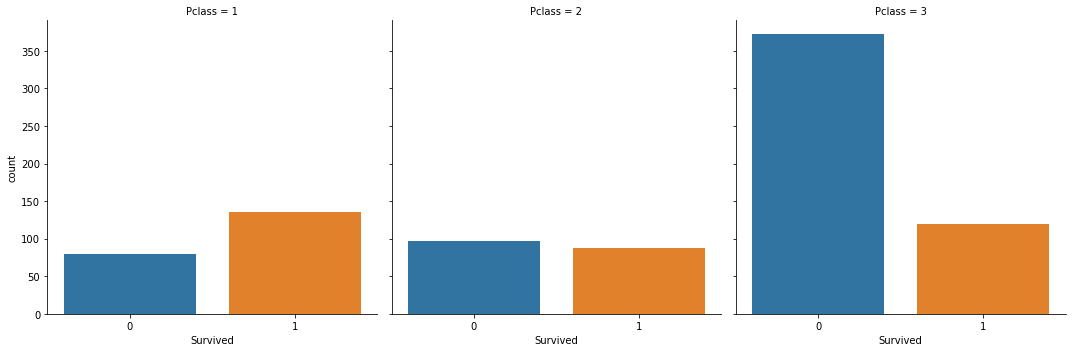

In [146]:
sns.factorplot(x = 'Survived', col = 'Pclass', kind = 'count', data = df)

### From above plots, it is clear that people with first class are more likely to Survive. People from third class are very very less likely to survive.

### Effect of Embarked on Survival

In [147]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

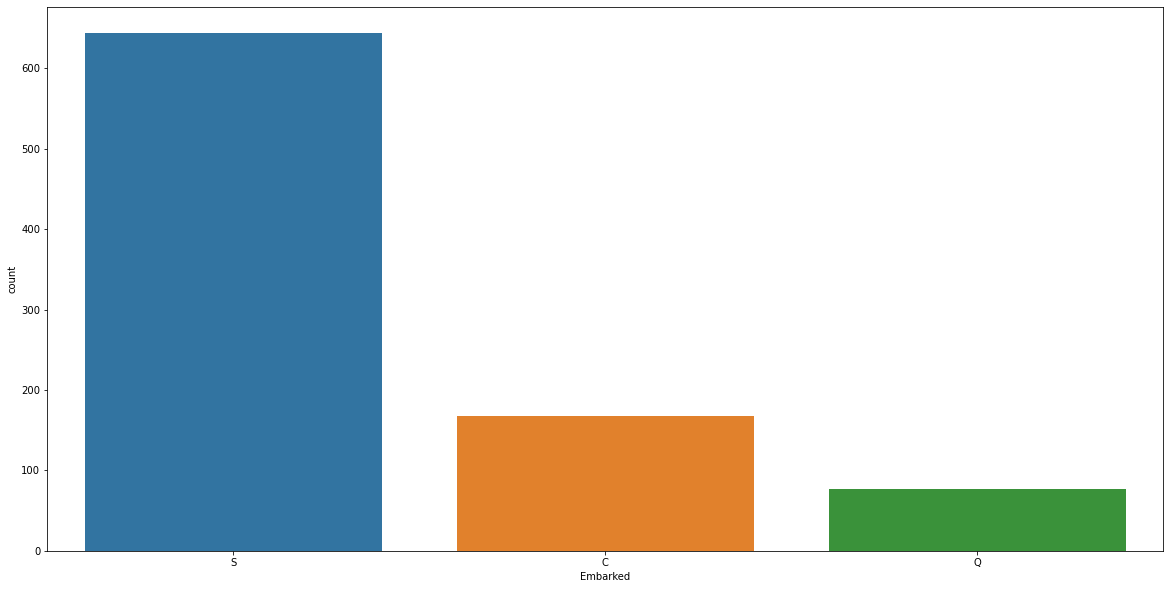

In [148]:
sns.countplot('Embarked',data=df)

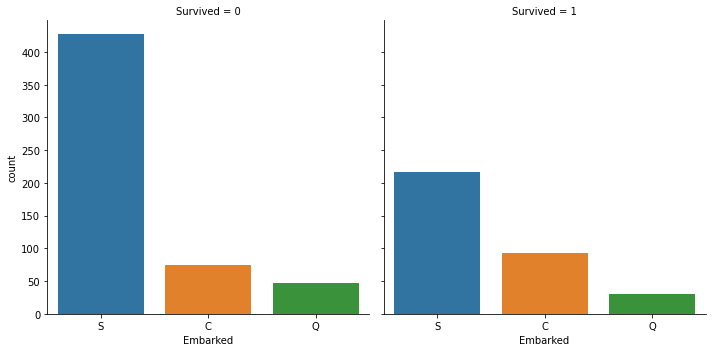

In [149]:
sns.factorplot(x = 'Embarked', col = 'Survived', kind = 'count', data = df)

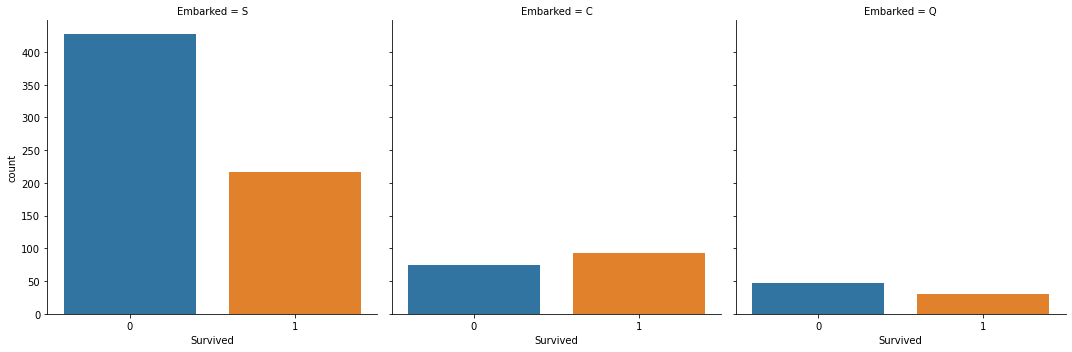

In [150]:
sns.factorplot(x = 'Survived', col = 'Embarked', kind = 'count', data = df);

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


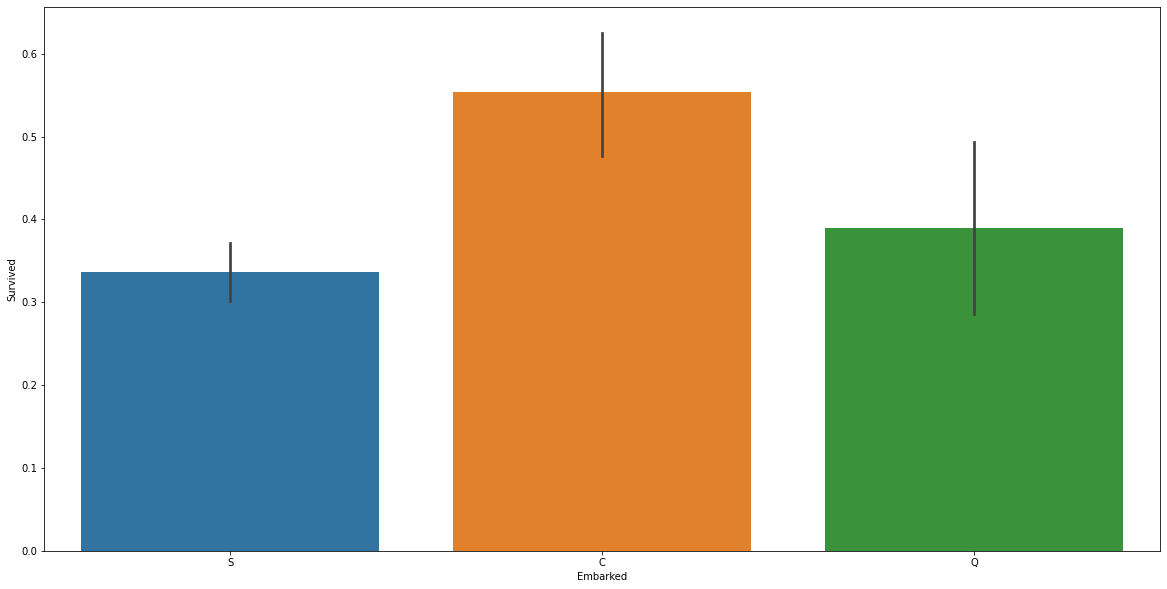

In [151]:
sns.barplot(x='Embarked',y='Survived',data=df)
df.groupby('Embarked',as_index=False).Survived.mean()

About 644 people got on RMS at Southampton, 168 at Cherbourg and only 77 at Queenstown.
People who got on boat at Cherbourg, comparatively have higher chances of survival.

## Effect of Fair on Survival

In [152]:
df.Fare.max()

512.3292

In [153]:
df.Fare.min()

0.0

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

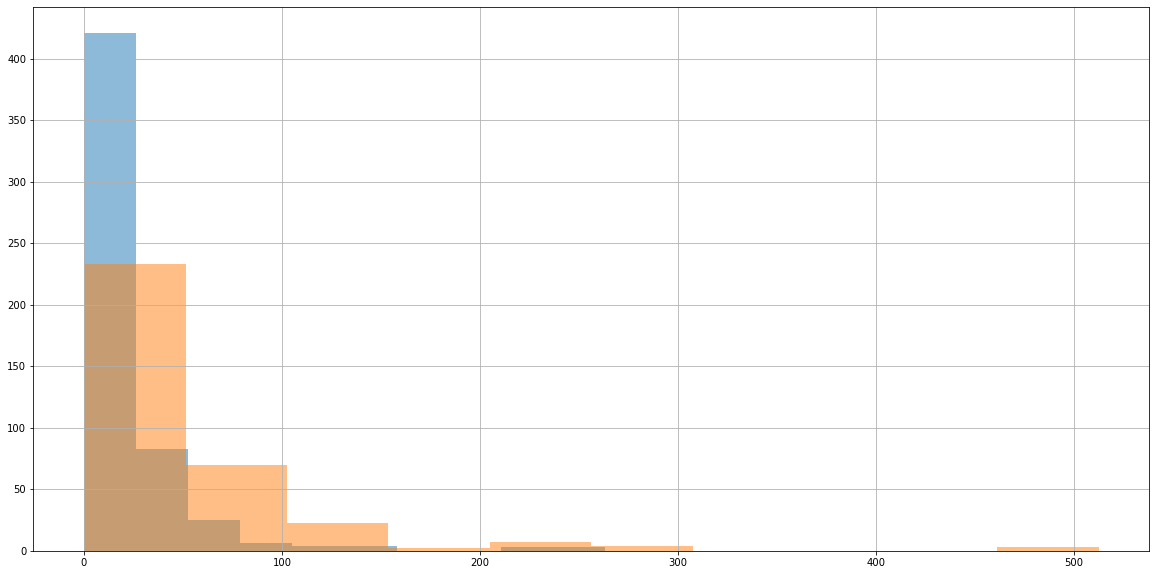

In [154]:
df.groupby('Survived').Fare.hist(alpha=0.5)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

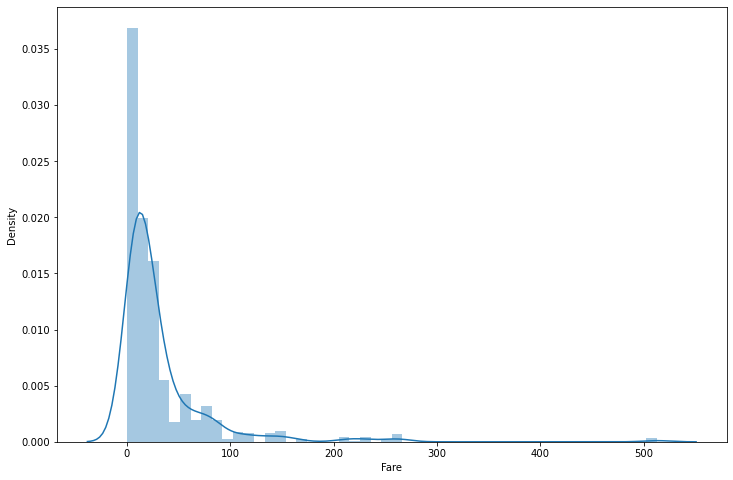

In [155]:
plt.figure(figsize=(12,8))
sns.distplot(df.Fare, kde = True)

### Conclusion
1. Higher the fare rates, higher the chances of survival
2. Highest fare value is 512 and lowest is 0. 
3. Because of this skewness present in Fail Feature.

## Effect of Parch on Survival

In [156]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

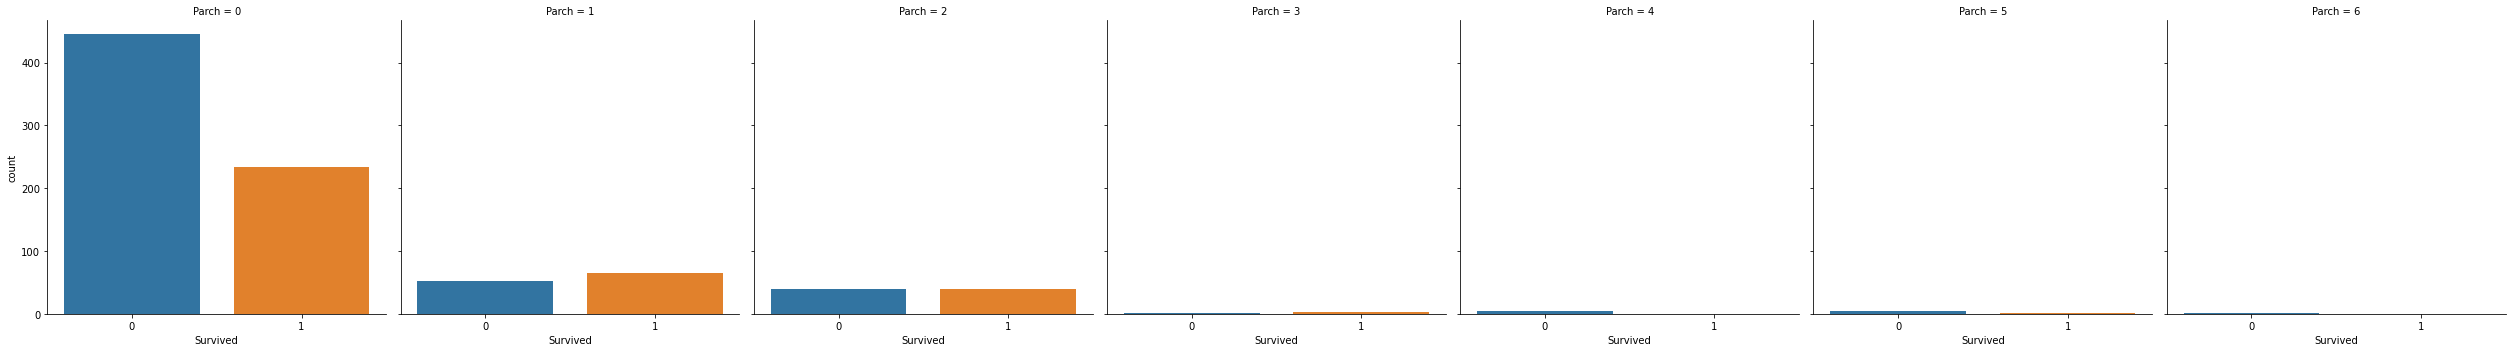

In [157]:
sns.factorplot(x = 'Survived', col = 'Parch', kind = 'count', data = df);

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


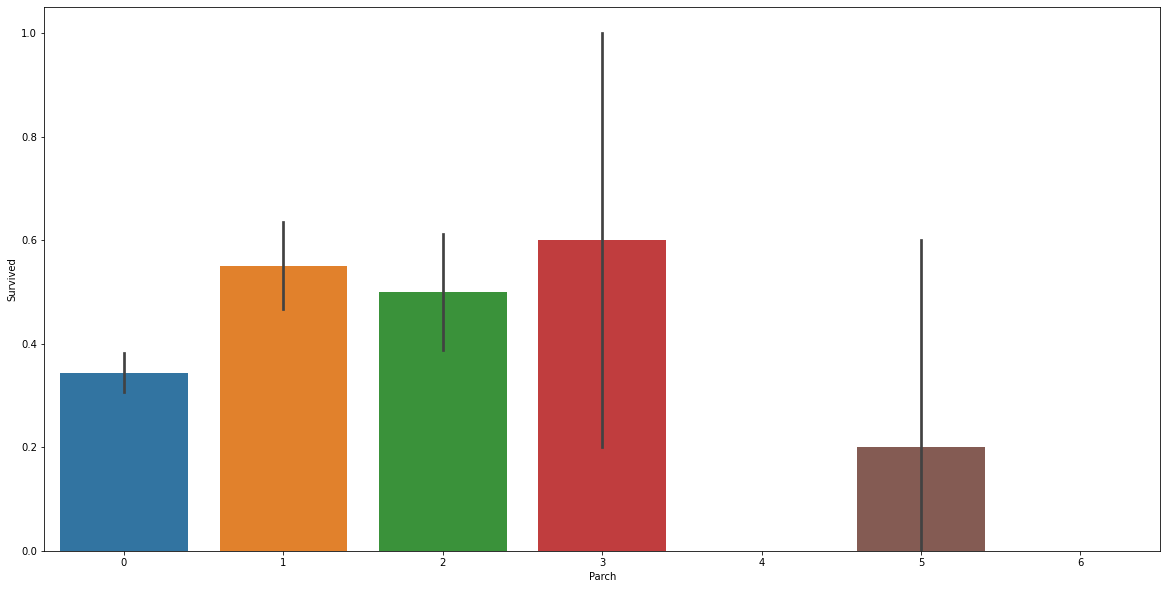

In [158]:
sns.barplot(x='Parch',y='Survived',data=df)
df.groupby('Parch',as_index=False).Survived.mean()

## Conclusion - 
Out of all Parch, Parch with 3 has highest number of survival and Parch 1 and 2 ranking second and third in survival %.

## Effect of SibSp on Survival

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


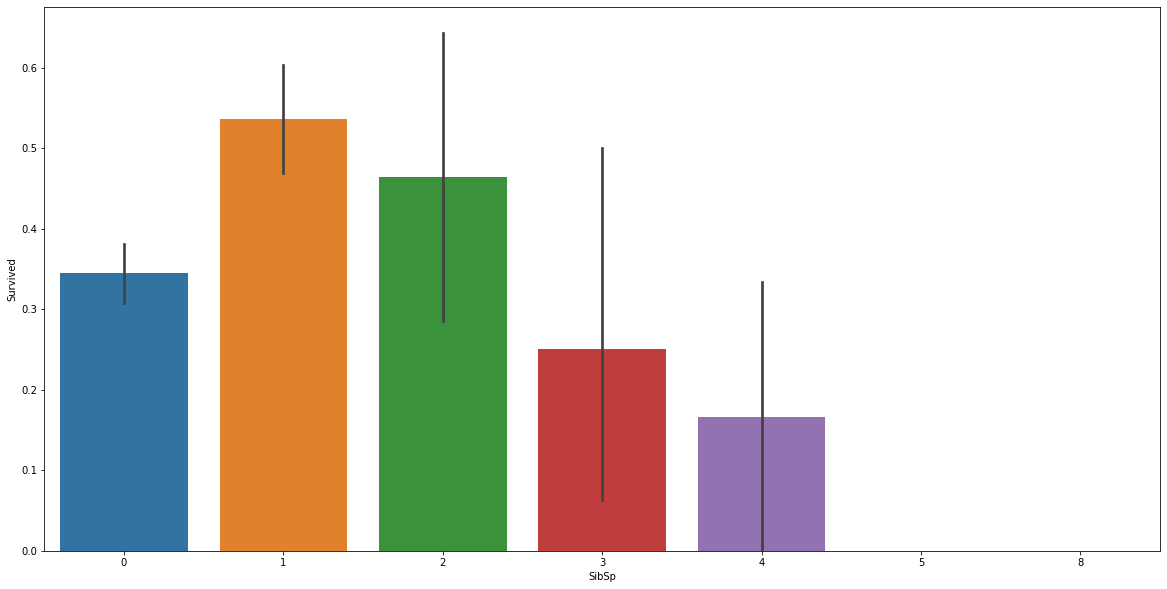

In [159]:
sns.barplot(x='SibSp',y='Survived',data=df)
df.groupby('SibSp',as_index=False).Survived.mean()

### Conclusion:
1. SibSp with 0, 1, 2 and 3 has significant impact on survival.

## Checking overall correlation matrix

In [160]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [161]:
df.corr().Survived

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

<AxesSubplot:>

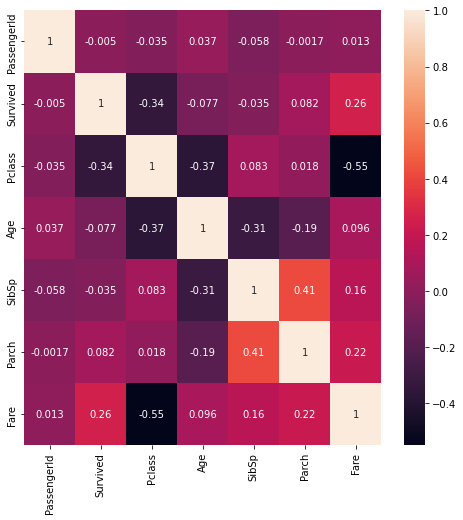

In [162]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)

# 4. Removing Outliers

<AxesSubplot:>

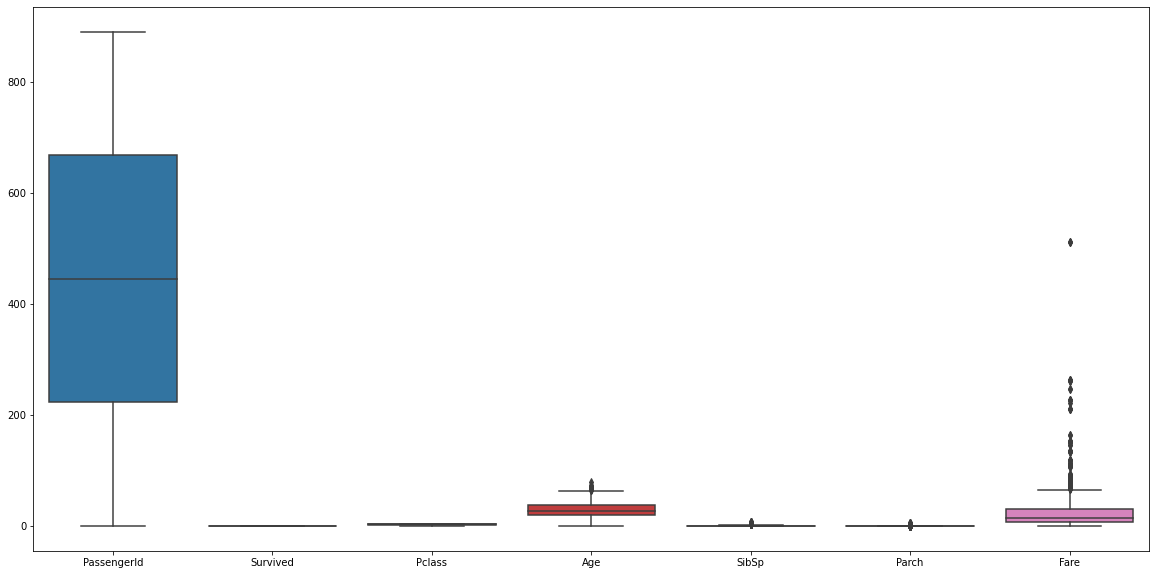

In [163]:
from pylab import rcParams  # for plotting box plot, to check outliers

rcParams['figure.figsize'] = 20, 10
sns.boxplot(data = df)

In [166]:
features = [feature for feature in df.columns if df[feature].dtype != 'O']
features.remove('Parch')

PassengerId       AxesSubplot(0.125,0.657941;0.168478x0.222059)
Survived       AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Pclass         AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Age            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
SibSp             AxesSubplot(0.125,0.391471;0.168478x0.222059)
Parch          AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Fare           AxesSubplot(0.529348,0.391471;0.168478x0.222059)
dtype: object

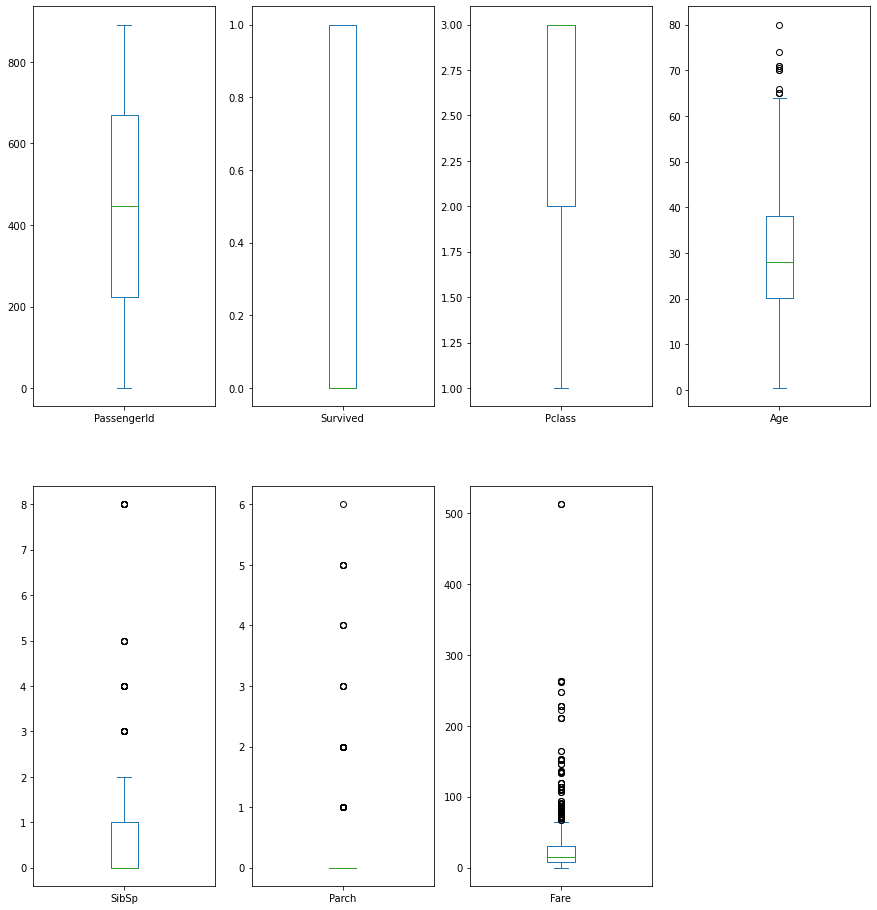

In [167]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))

We have found some outliers in fare, Age and SibSp

In [168]:
dic = {}
for feature in features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

PassengerId       AxesSubplot(0.125,0.657941;0.168478x0.222059)
Survived       AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Pclass         AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Age            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
SibSp             AxesSubplot(0.125,0.391471;0.168478x0.222059)
Parch          AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Fare           AxesSubplot(0.529348,0.391471;0.168478x0.222059)
dtype: object

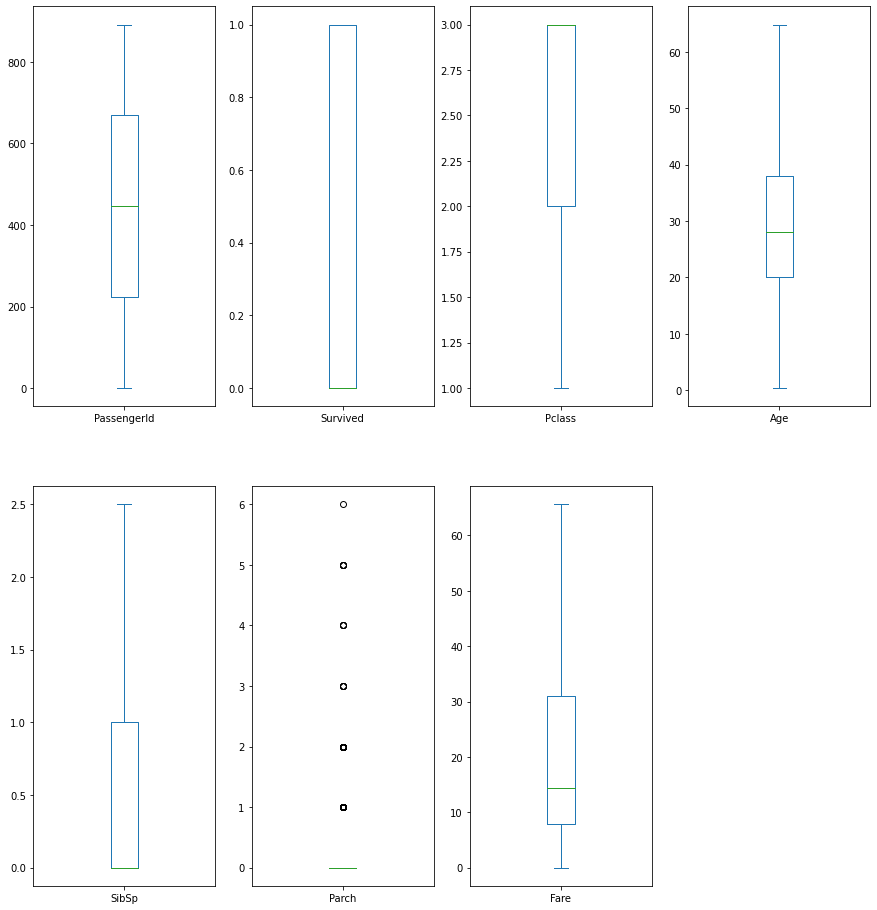

In [170]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))

After dropping, there are no outliers present in data. Check skewness of data. We can ignore parch, as these are not outliers

In [171]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.299095
SibSp          1.621154
Parch          2.749117
Fare           1.082179
dtype: float64

# 5. Handling missing values

In [173]:
## Replacing the numerical Missing Values
for feature in features:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature].fillna(median_value,inplace=True)
    
df[features].isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Fare           0
dtype: int64

In [174]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,S


# 6. Variable Encoding

In [175]:
le = LabelEncoder()

In [176]:
df['Sex']=le.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,NaN,S


In [177]:
df['Embarked']=le.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,NaN,2
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,C85,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,2
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,C123,2
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,NaN,2


In [178]:
df['Pclass']=le.fit_transform(df['Pclass'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,2,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,NaN,2
1,2.0,1.0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,C85,0
2,3.0,1.0,2,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,2
3,4.0,1.0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,C123,2
4,5.0,0.0,2,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,NaN,2


In [179]:
df.corr()["Survived"].sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.163517
Age           -0.064831
PassengerId   -0.005007
SibSp          0.031434
Parch          0.081629
Fare           0.317430
Survived       1.000000
Name: Survived, dtype: float64

# Checking Skewness and Distribution of Data

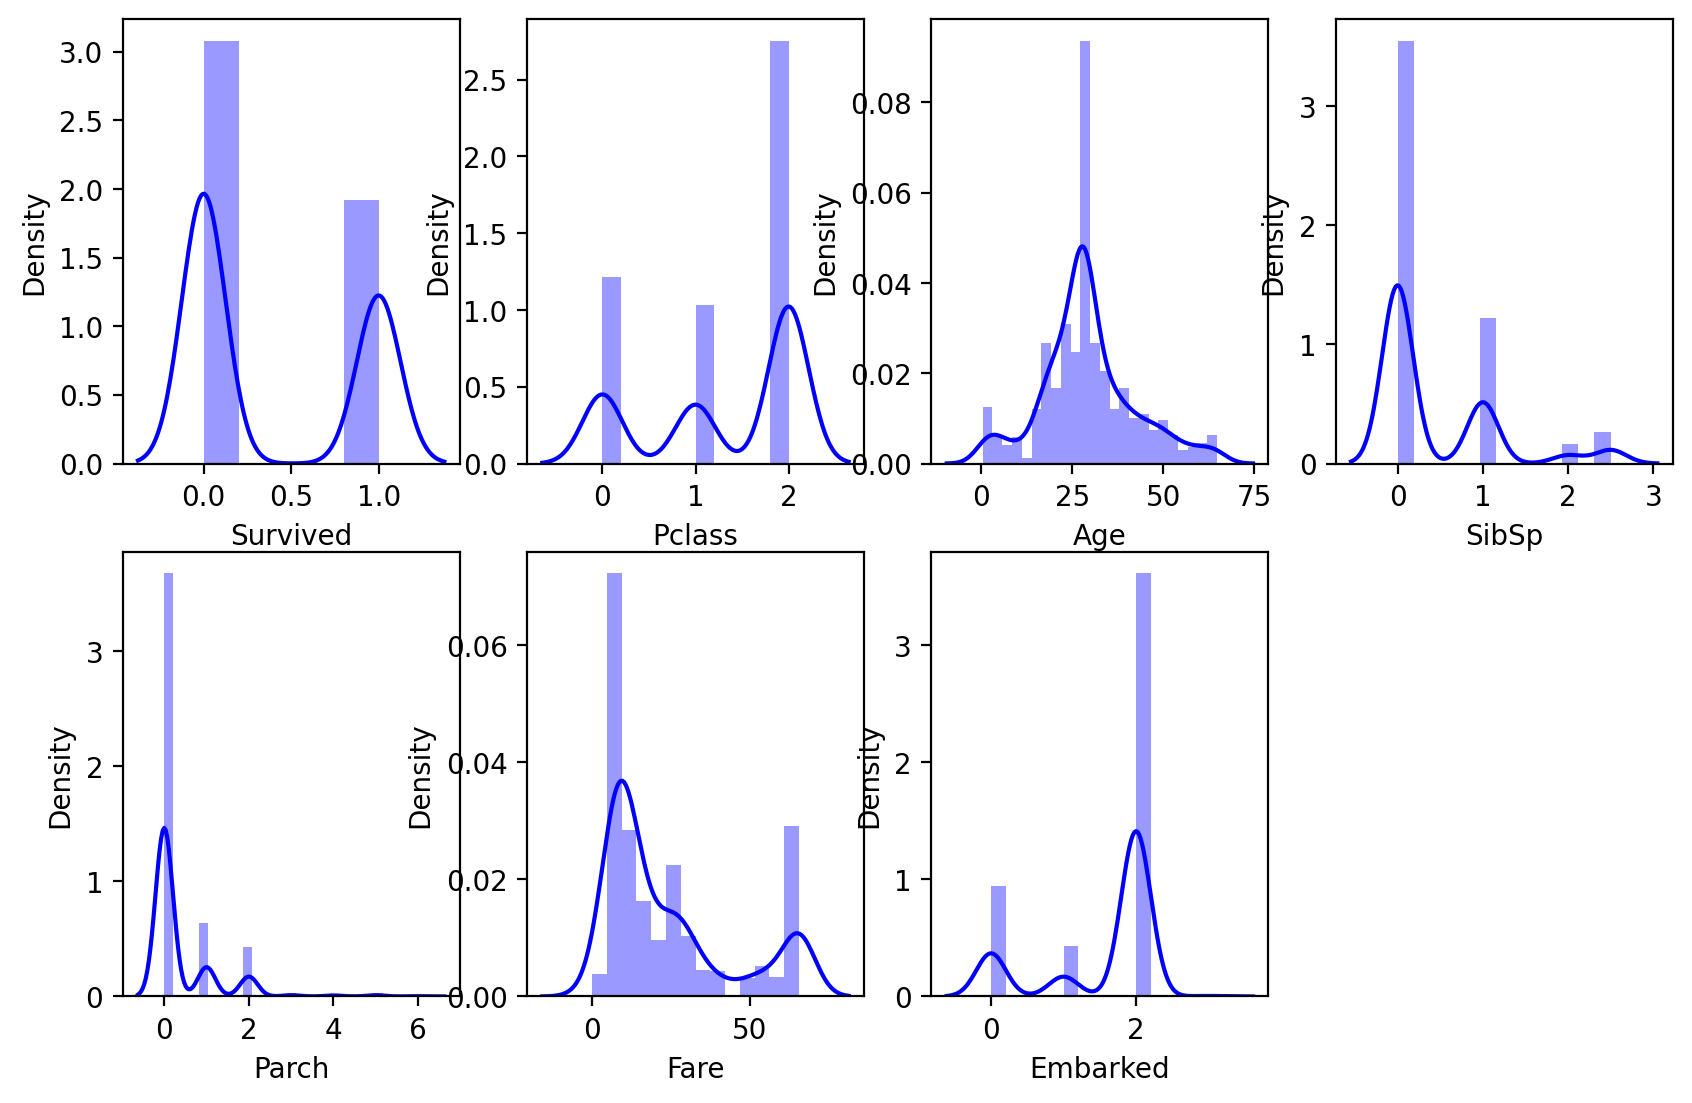

In [216]:
plt.figure(figsize=(10,10),dpi=200)
for i in enumerate(df[df.columns.drop(['Sex', 'Name', 'Ticket', 'Cabin', 'PassengerId'])]):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

<AxesSubplot:xlabel='Sex', ylabel='Density'>

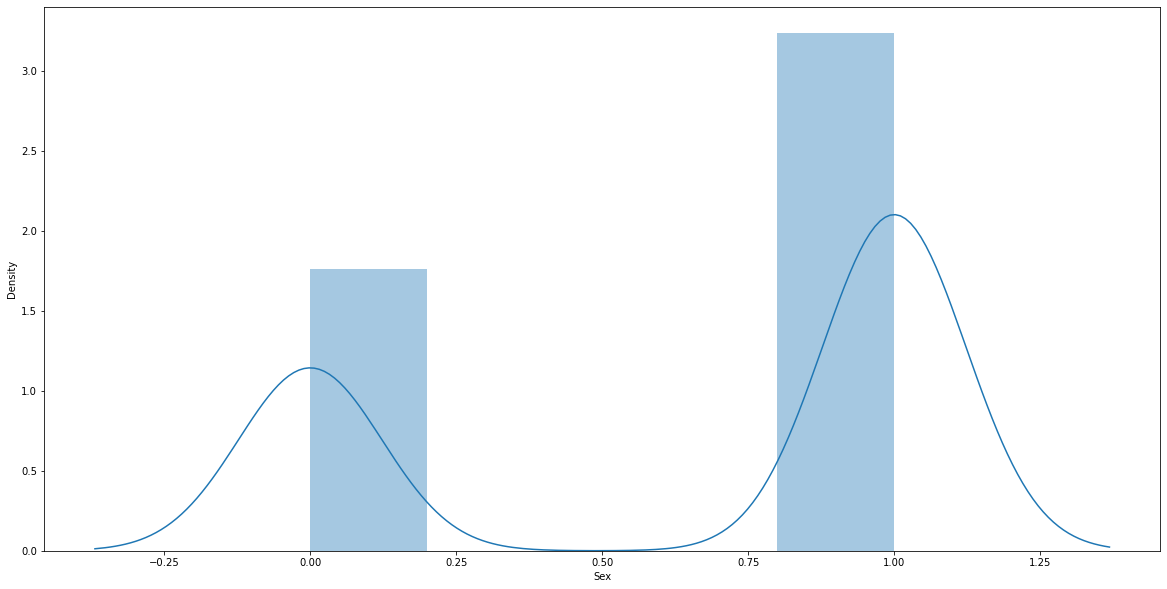

In [183]:
sns.distplot(df['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

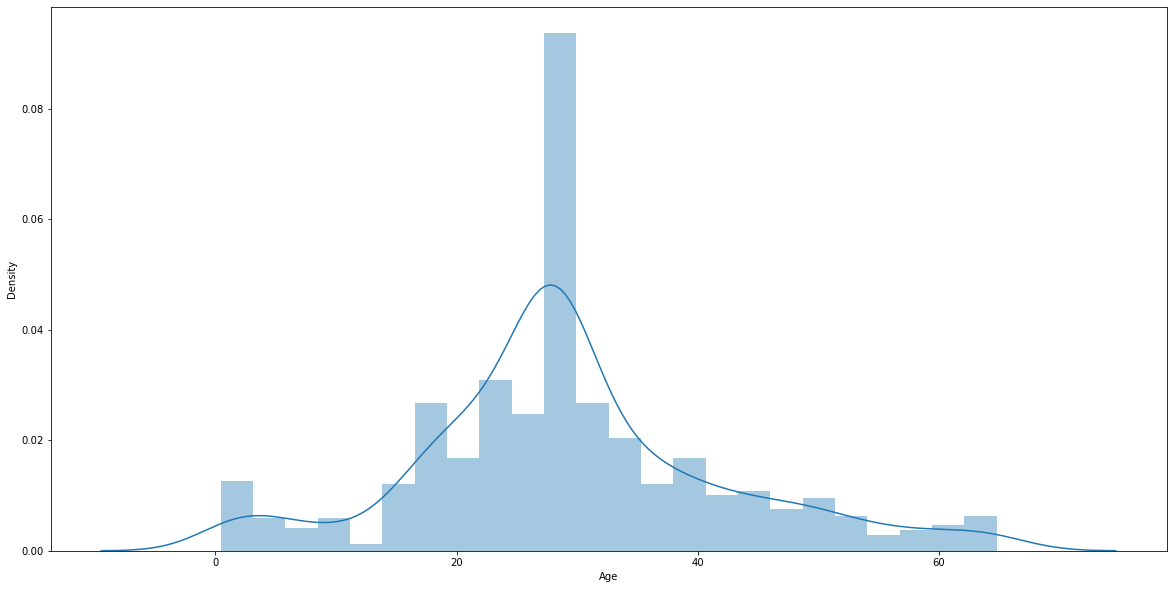

In [180]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

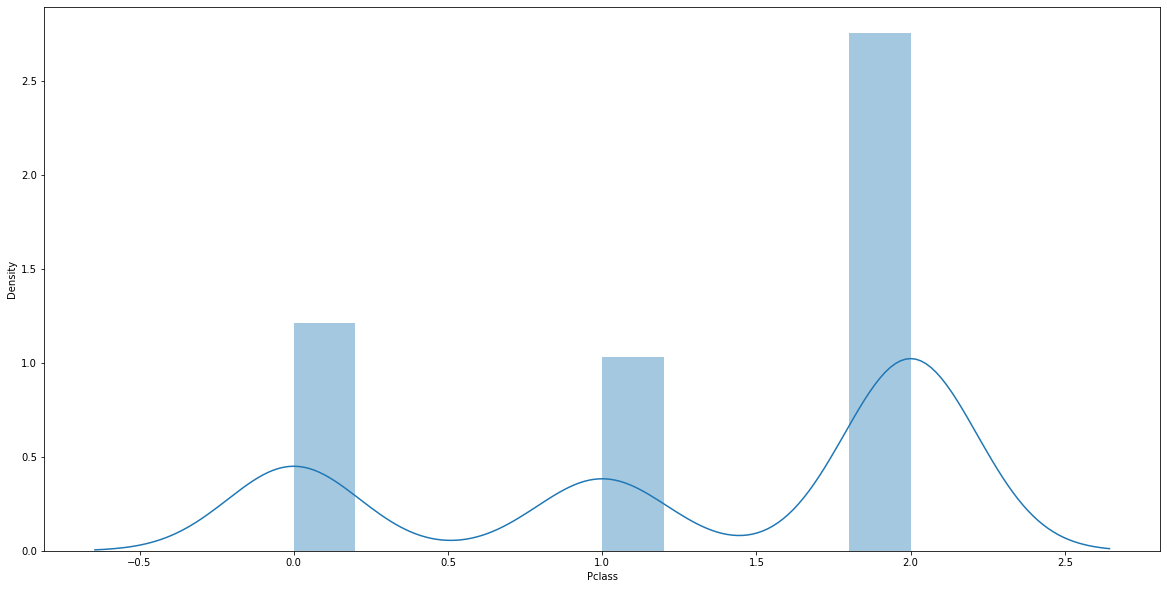

In [186]:
sns.distplot(df['Pclass'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

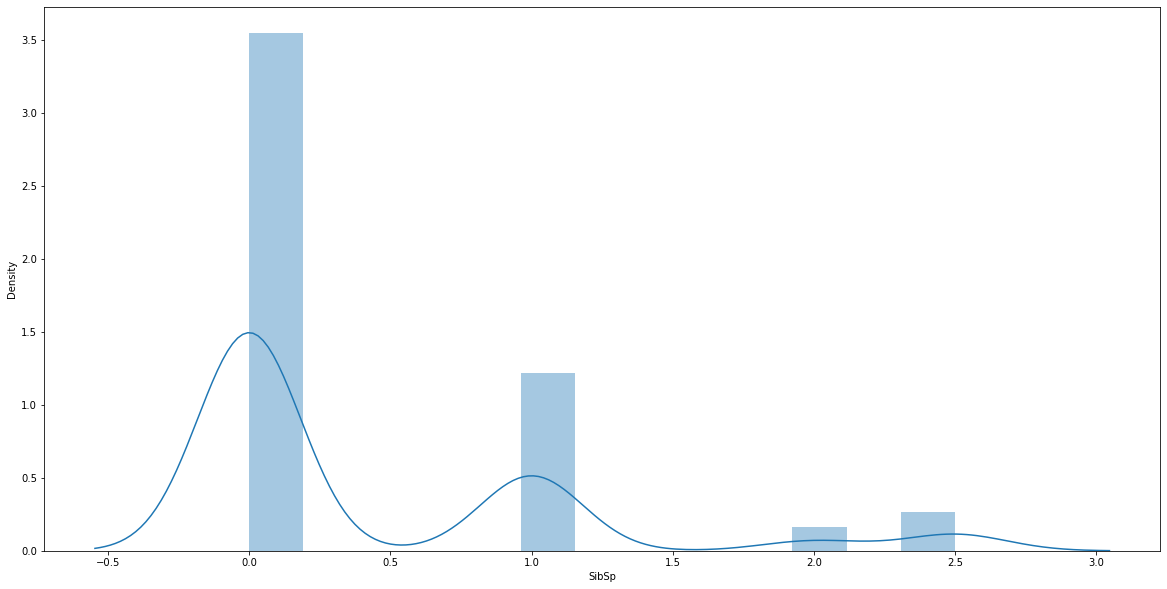

In [187]:
sns.distplot(df['SibSp'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

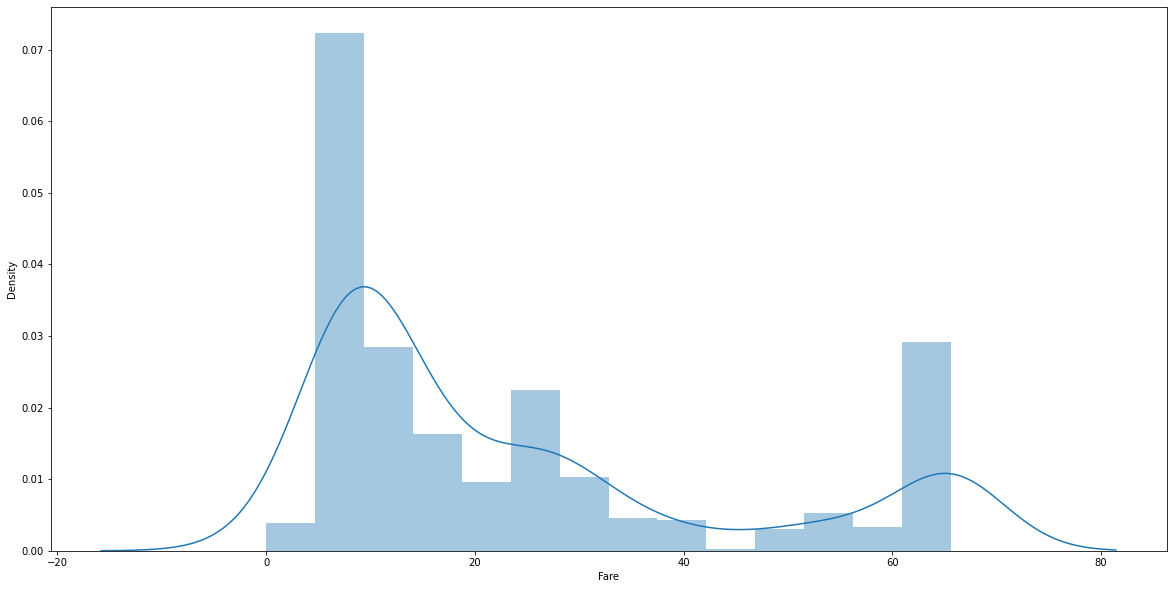

In [188]:
sns.distplot(df['Fare'])

# Observations:
Looking at the above distribution plots we can see that there is skewness due to the outliers which we saw in the boxplot. Still there are many that are showing a bell shape curve indicating a normal distribution.

In [204]:
x = df[{'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked'}]

In [206]:
y = df[{'Survived'}]

In [230]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Variance Inflation Factor

In [223]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [224]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [225]:
calc_vif(x)

,variables,VIF FACTOR
0,Sex,3.022308
1,Age,5.532778
2,SibSp,2.051523
3,Fare,4.010717
4,Parch,1.660518
5,Pclass,4.024735
6,Embarked,4.446850


### Observations:
From the above results we can see that the VIF is very low. So we can proceed for model building.

## Percentage Loss
For model building we have dropped these columns.
   1. PassangerID - Passanger ID does not play important role. Uniquness 891/891 - So no relation between Id and survival
       - Person can have any passanger id based on ticket booking, so it dosent affect model.
       - As we have not considered whole 
   2. Name - Uniquness 891/891 - So no relation between Name and survival
       - Person can have any name based on their parents choice
   3. Ticket - Unique Values 681/891 - So no relation between Ticket No. and survival
       - Similar to passangerID, person can have any ticket number.
   4. Cabin - Unique Values 147/204 - Lots of missing values, so dropping columns is considered for evaulation
       - SO many missing values, if considered imputed for model prediction, then result generated could me manipulated. 

# Scaling the independant variable (x) to get all the columns in a standard scale

In [254]:
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[ 0.73769513, -0.56930026,  0.81022003, ..., -0.47367361,
         0.82737724,  0.58111394],
       [-1.35557354,  0.67842214,  0.81022003, ..., -0.47367361,
        -1.56610693, -1.93846038],
       [-1.35557354, -0.25736966, -0.60251196, ..., -0.47367361,
         0.82737724,  0.58111394],
       ...,
       [-1.35557354, -0.10140436,  0.81022003, ...,  2.00893337,
         0.82737724,  0.58111394],
       [ 0.73769513, -0.25736966, -0.60251196, ..., -0.47367361,
        -1.56610693, -1.93846038],
       [ 0.73769513,  0.21052624, -0.60251196, ..., -0.47367361,
         0.82737724, -0.67867322]])

since the different columns were out of scale we performed scaling operation on all the independant variables columns to bring it into the same scale.

We used Standard Scaler method to ensure all my independant variables columns have been standardized.

In [258]:
x = pd.DataFrame(x1,columns=x.columns)

In [259]:
x

,Sex,Age,SibSp,Fare,Parch,Pclass,Embarked
0,0.737695,-0.569300,0.810220,-0.820552,-0.473674,0.827377,0.581114
1,-1.355574,0.678422,0.810220,2.031623,-0.473674,-1.566107,-1.938460
2,-1.355574,-0.257370,-0.602512,-0.787578,-0.473674,0.827377,0.581114
3,-1.355574,0.444474,0.810220,1.419297,-0.473674,-1.566107,0.581114
4,0.737695,0.444474,-0.602512,-0.781471,-0.473674,0.827377,0.581114
...,...,...,...,...,...,...,...
886,0.737695,-0.179387,-0.602512,-0.539655,-0.473674,-0.369365,0.581114
887,-1.355574,-0.803248,-0.602512,0.290823,-0.473674,-1.566107,0.581114
888,-1.355574,-0.101404,0.810220,-0.029155,2.008933,0.827377,0.581114
889,0.737695,-0.257370,-0.602512,0.290823,-0.473674,-1.566107,-1.938460


# Data is ready for Machine Learning Models

In [263]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

## Algorithms to apply

In [266]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [267]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7653631284916201
Cross-val-score= 0.7767410015649452


roc_auc_score 0.7334650856389988


              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       110
         1.0       0.75      0.59      0.66        69

    accuracy                           0.77       179
   macro avg       0.76      0.73      0.74       179
weighted avg       0.76      0.77      0.76       179



[[96 14]
 [28 41]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


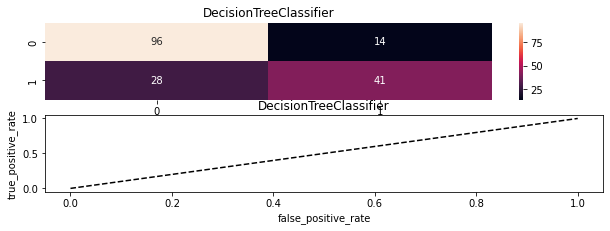

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8044692737430168
Cross-val-score= 0.8047535211267606


roc_auc_score 0.7733860342555995


              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       110
         1.0       0.81      0.64      0.72        69

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



[[100  10]
 [ 25  44]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


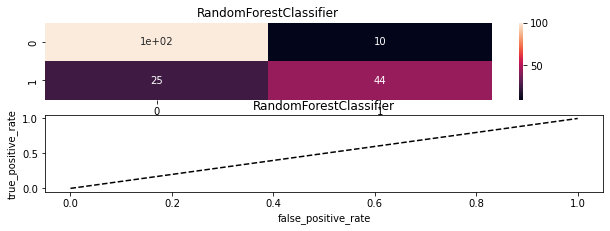

************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.7653631284916201
Cross-val-score= 0.8131064162754302


roc_auc_score 0.7334650856389988


              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       110
         1.0       0.75      0.59      0.66        69

    accuracy                           0.77       179
   macro avg       0.76      0.73      0.74       179
weighted avg       0.76      0.77      0.76       179



[[96 14]
 [28 41]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


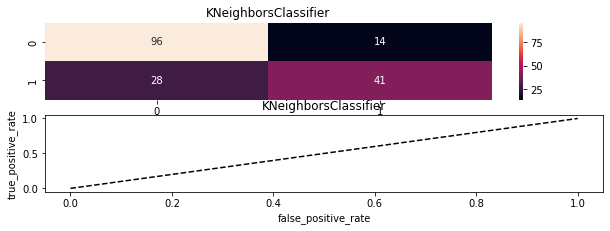

************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.7262569832402235
Cross-val-score= 0.7597417840375587


roc_auc_score 0.6962450592885374


              precision    recall  f1-score   support

         0.0       0.75      0.83      0.79       110
         1.0       0.67      0.57      0.61        69

    accuracy                           0.73       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.72      0.73      0.72       179



[[91 19]
 [30 39]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


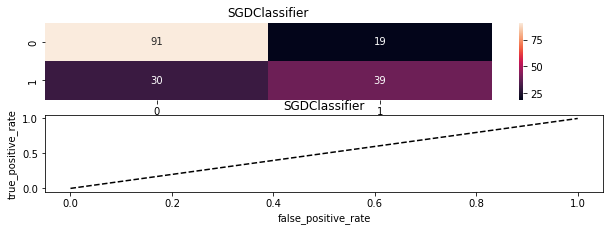

************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.7318435754189944
Cross-val-score= 0.8034233176838811


roc_auc_score 0.700790513833992


              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79       110
         1.0       0.68      0.57      0.62        69

    accuracy                           0.73       179
   macro avg       0.72      0.70      0.71       179
weighted avg       0.73      0.73      0.73       179



[[92 18]
 [30 39]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


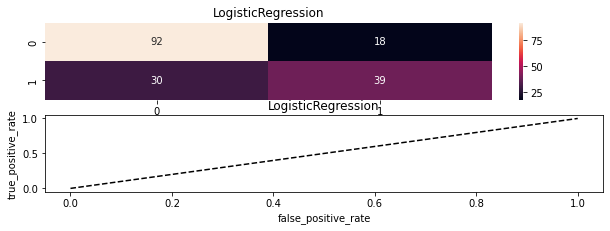

In [268]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10)
    # ---------------------------------------------------------------------------------------------------------
    
    cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    # ---------------------------------------------------------------------------------------------------------
        
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [270]:
for i in range(0, 20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.fit_transform(x_test)
    
    
    dtc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    lg=LogisticRegression()
    knc=KNeighborsClassifier()
    sgc=SGDClassifier()
    svc = LinearSVC()
    gbc = GradientBoostingClassifier()
    gnb = GaussianNB()
    
    
    seed=7
    #prepare models
    models=[]
    models.append(('DecisionTreeClassifier',dtc))
    models.append(('RandomForestClassifier',rfc))
    models.append(('KNeighborsClassifier',knc))
    models.append(('SGDClassifier',sgc))
    models.append(('LogisticRegression',lg))
    models.append(('LinearSVC', svc))
    models.append(('GradientBoostingClassifier', gbc))
    models.append(('GaussianNB', gnb))
    
    
    
    #evaluate each model in turn ----------------------------------------------------------------------------------------
    Model=[]
    cvs=[]
    score=[]
    rocscore=[]
    for name,model in models:
        # print('**************',name,'***********')
        # print('\n')
        Model.append(name)
        model.fit(x_train,y_train)
        # print(model)
        pred=model.predict(x_test)
        # print('\n')
        acc=accuracy_score(y_test,pred)
        # print('accuracy score',acc)
        score.append(acc*100)
        kfold=model_selection.KFold(n_splits=10)
        # ---------------------------------------------------------------------------------------------------------

        cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
        # print('Cross-val-score=',cv)
        cvs.append(cv*100)
        # print('\n')
        # ---------------------------------------------------------------------------------------------------------

        false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
        roc_auc=roc_auc_score(y_test,pred)
        # print('roc_auc_score',roc_auc)
        rocscore.append(roc_auc*100)
        # print('\n')
        # print(classification_report(y_test,pred))
        # print('\n')
        cm=confusion_matrix(y_test,pred)
        # print(cm)
        # print('\n')
        # plt.figure(figsize=(10,15))
        # plt.subplot(911)
        # plt.title(name)
        # print(sns.heatmap(cm,annot=True))
        # plt.subplot(912)
        # plt.title(name)

        # plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
        # plt.plot([0,1],[0,1],'k--')
        # plt.xlabel('false_positive_rate')
        # plt.ylabel('true_positive_rate')
        # plt.show()
        
        
    result=pd.DataFrame({'Model':Model, 'cvs' :cvs, 'score' :score, 'rocscore' :rocscore}, columns=['Model', 'cvs','score','rocscore'])
    print(f'\033[1m ------------------------ Results with Random State {i} ------------------------')
    print(result)
    result['score']

 ------------------------ Results with Random State 0 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  76.265649  73.184358  71.969697
1      RandomForestClassifier  80.058685  79.888268  77.964427
2        KNeighborsClassifier  78.939750  81.564246  79.598155
3               SGDClassifier  75.719875  78.770950  77.595520
4          LogisticRegression  78.802817  82.122905  80.592885
5                   LinearSVC  79.084507  78.212291  76.600791
6  GradientBoostingClassifier  82.588028  83.240223  79.611331
7                  GaussianNB  75.856808  78.770950  78.945982
 ------------------------ Results with Random State 1 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  76.823161  67.597765  64.965107
1      RandomForestClassifier  82.453052  78.212291  75.206772
2        KNeighborsClassifier  80.203443  76.536313  73.151977
3               SGDClas

 ------------------------ Results with Random State 13 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  76.827074  72.625698  72.055336
1      RandomForestClassifier  77.951878  83.240223  82.042161
2        KNeighborsClassifier  79.223396  80.446927  78.959157
3               SGDClassifier  76.842723  74.301676  67.747036
4          LogisticRegression  77.678013  83.798883  82.766798
5                   LinearSVC  77.681925  83.798883  82.496706
6  GradientBoostingClassifier  82.173318  83.240223  80.961792
7                  GaussianNB  75.571205  79.888268  79.855072
 ------------------------ Results with Random State 14 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  77.521518  79.329609  76.983696
1      RandomForestClassifier  80.496870  80.446927  78.546196
2        KNeighborsClassifier  79.919797  79.888268  77.072011
3               SGDCl

In [271]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [272]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [273]:
clf_gb.best_score_

0.8004890453834117

In [274]:
clf_gb.best_params_

{'n_estimators': 500}

In [275]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.224835,0.00632,0.0,0.0,500,{'n_estimators': 500},0.805556,0.847222,0.746479,0.788732,0.84507,0.760563,0.830986,0.802817,0.760563,0.816901,0.800489,0.034125,1


In [276]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.8491620111731844